<a href="https://colab.research.google.com/github/MIRYALASAITEJA/23CSBTB30/blob/main/Crop_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load refined dataset
df = pd.read_csv('/content/Crop_Data.xlsx.csv')
print(df.head())
print(df.columns)



   temperature   humidity        ph    rainfall label  Label_Num
0    20.879744  82.002744  6.502985  202.935536  rice          0
1    21.770462  80.319644  7.038096  226.655537  rice          0
2    23.004459  82.320763  7.840207  263.964248  rice          0
3    26.491096  80.158363  6.980401  242.864034  rice          0
4    20.130175  81.604873  7.628473  262.717340  rice          0
Index(['temperature', 'humidity', 'ph', 'rainfall', 'label', 'Label_Num'], dtype='object')


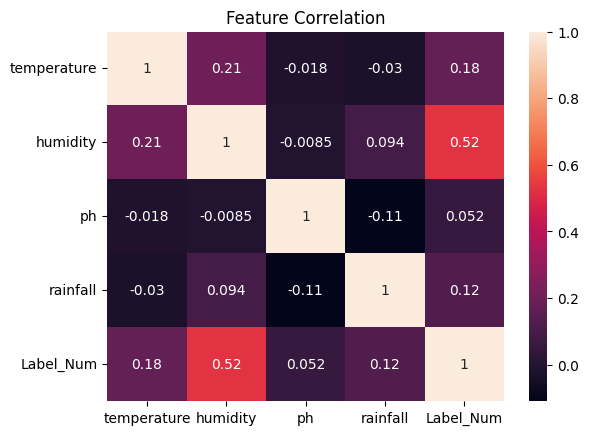

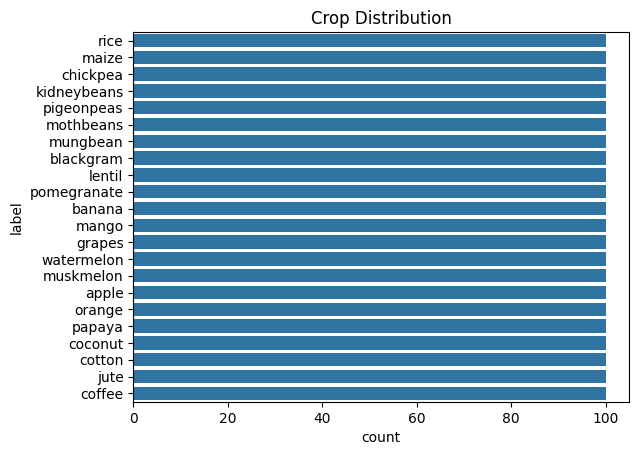

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
# Exclude the 'label' column which contains string values
sns.heatmap(df.drop('label', axis=1).corr(), annot=True)
plt.title("Feature Correlation")
plt.show()

# Crop distribution
sns.countplot(y='label', data=df)
plt.title("Crop Distribution")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df[['temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9636363636363636
              precision    recall  f1-score   support

       apple       0.96      0.96      0.96        23
      banana       1.00      1.00      1.00        21
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       0.88      1.00      0.93        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.79      0.88        24
    mungbean       1.00      0.95      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.81      0.93      0.87        1

In [8]:
# Sample input
sample = [[28.5, 80, 6.5, 180]]  # Temp, Humidity, Ph, Rainfall
predicted = model.predict(sample)
print("Recommended Crop:", le.inverse_transform(predicted)[0])


Recommended Crop: jute


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
import numpy as np
import pandas as pd

# Generate synthetic 15-year climate data
years = list(range(2025, 2040))

future_data = {
    'year': years,
    'temperature': np.random.normal(27.0, 1.5, 15),
    'humidity': np.random.normal(75, 5, 15),
    'ph': np.full(15, 6.5),
    'rainfall': np.random.normal(180, 20, 15)
}

future_df = pd.DataFrame(future_data)


In [28]:
# Predict crops
future_predictions = model.predict(future_df[['temperature', 'humidity', 'ph', 'rainfall']])

# Add predicted crop names
future_df['Recommended Crop'] = le.inverse_transform(future_predictions)

# Display the result
print(future_df)



    year  temperature   humidity   ph    rainfall Recommended Crop
0   2025    26.326830  78.853523  6.5  197.734928             jute
1   2026    30.019168  67.550059  6.5  172.527155       pigeonpeas
2   2027    23.885638  79.987608  6.5  139.761046             jute
3   2028    26.382976  79.978625  6.5  202.685008             rice
4   2029    27.702660  70.045034  6.5  172.091665           coffee
5   2030    29.721795  68.590622  6.5  188.976022       pigeonpeas
6   2031    28.657623  80.196517  6.5  198.896911           banana
7   2032    26.804081  90.844183  6.5  172.078680           papaya
8   2033    25.035166  70.776410  6.5  193.740581             jute
9   2034    25.063012  77.114262  6.5  184.789848             jute
10  2035    27.062546  69.214876  6.5  207.360686           coffee
11  2036    25.688328  73.553931  6.5  156.679113             jute
12  2037    29.769935  72.213244  6.5  162.870227       pigeonpeas
13  2038    23.509831  71.989502  6.5  153.050524             

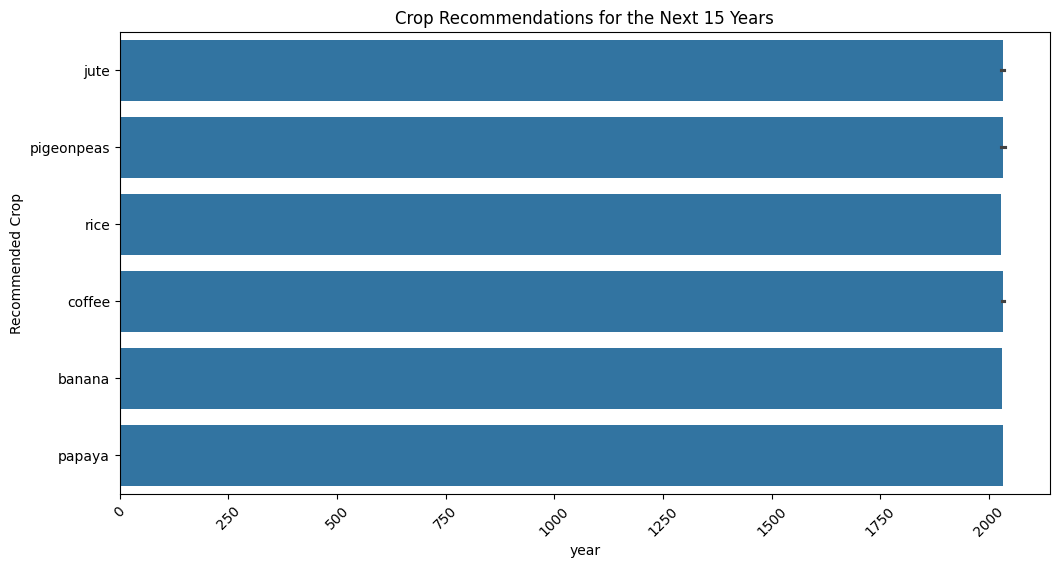

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='Recommended Crop', data=future_df)
plt.xticks(rotation=45)
plt.title("Crop Recommendations for the Next 15 Years")
plt.show()


In [32]:
import numpy as np

# Create synthetic soil types (for demo purposes)
soil_types = ['Alluvial', 'Black', 'Red', 'Laterite']
df['Soil_Type'] = np.random.choice(soil_types, size=len(df))


In [33]:
from sklearn.preprocessing import LabelEncoder
soil_le = LabelEncoder()
df['Soil_Type_Label'] = soil_le.fit_transform(df['Soil_Type'])

from sklearn.ensemble import GradientBoostingClassifier
soil_model = GradientBoostingClassifier()
soil_model.fit(X, df['Soil_Type_Label'])

# Predict soil type for a new input
sample = [[28.5, 80, 6.5, 180]]  # temp, humidity, ph, rainfall
soil_pred = soil_model.predict(sample)
print("Predicted Soil Type:", soil_le.inverse_transform(soil_pred)[0])


Predicted Soil Type: Laterite


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [34]:
import joblib

joblib.dump(model, 'crop_recommendation_model.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']